In [1]:
import pandas as pd
# 读取CSV文件
df = pd.read_csv("data/train.csv")

In [2]:
 df.head()

,id,heartbeat_signals,label
0,0,"0.9912297987616655,0.9435330436439665,0.764677...",0.0
1,1,"0.9714822034884503,0.9289687459588268,0.572932...",0.0
2,2,"1.0,0.9591487564065292,0.7013782792997189,0.23...",2.0
3,3,"0.9757952826275774,0.9340884687738161,0.659636...",0.0
4,4,"0.0,0.055816398940721094,0.26129357194994196,0...",2.0


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb

 

# 步骤1: 数据预处理
# 分割心跳信号序列为数值列表
df['heartbeat_signals'] = df['heartbeat_signals'].apply(lambda x: [float(i) for i in x.split(',')])

# 将列表转换为DataFrame的列
max_length = max(df['heartbeat_signals'].apply(len))  # 找到最长序列的长度
signals_df = pd.DataFrame(df['heartbeat_signals'].tolist()).fillna(0)  # 用0填充缺失值
df = pd.concat([df, signals_df], axis=1)

# 删除原始的heartbeat_signals列
df = df.drop('heartbeat_signals', axis=1)

 


In [4]:
  df.head()

,id,label,0,1,2,3,4,5,6,7,...,195,196,197,198,199,200,201,202,203,204
0,0,0.0,0.991230,0.943533,0.764677,0.618571,0.379632,0.190822,0.040237,0.025995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.971482,0.928969,0.572933,0.178457,0.122962,0.132360,0.094392,0.089575,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2.0,1.000000,0.959149,0.701378,0.231778,0.000000,0.080698,0.128376,0.187448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.975795,0.934088,0.659637,0.249921,0.237116,0.281445,0.249921,0.249921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2.0,0.000000,0.055816,0.261294,0.359847,0.433143,0.453698,0.499004,0.542796,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:

from imblearn.over_sampling import SMOTE
# 步骤3: 模型训练
X = df.drop(['id', 'label'], axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 使用SMOTE进行过采样处理类别不平衡，只对训练集进行处理
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
import numpy as np
import xgboost as xgb

# 假设 X 和 y 已经准备好了，X 是特征矩阵，y 是目标变量
kf = KFold(n_splits=5, shuffle=True, random_state=42)

abs_sum_scores = []  # 存储每一折的评分

for train_index, test_index in kf.split(X):
    X_resampled, X_test = X.iloc[train_index], X.iloc[test_index]
    y_resampled, y_test = y[train_index], y[test_index]

    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    model.fit(X_resampled, y_resampled)
    
    # 预测概率
    y_pred_proba = model.predict_proba(X_test)
    
    # 计算abs-sum
    # 首先，我们需要将y_test转换为one-hot编码形式，以匹配y_pred_proba的格式
    y_test_one_hot = np.zeros((y_test.size, y_pred_proba.shape[1]))
    y_test_one_hot[np.arange(y_test.size), y_test.astype(int)] = 1
    
    abs_sum = np.abs(y_test_one_hot - y_pred_proba).sum() / y_test.size
    abs_sum_scores.append(abs_sum)

# 计算平均abs-sum分数
average_abs_sum = np.mean(abs_sum_scores)
print(f"Average Abs-Sum Score: {average_abs_sum}")


Average Abs-Sum Score: 0.047693560848185025


In [7]:
import pandas as pd
# 读取CSV文件
df1 = pd.read_csv("data/testA.csv")

In [8]:
 import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb

# 假设 df 是包含上述数据的DataFrame

# 步骤1: 数据预处理
# 分割心跳信号序列为数值列表
df1['heartbeat_signals'] = df1['heartbeat_signals'].apply(lambda x: [float(i) for i in x.split(',')])

# 将列表转换为DataFrame的列
max_length = max(df1['heartbeat_signals'].apply(len))  # 找到最长序列的长度
signals_df = pd.DataFrame(df1['heartbeat_signals'].tolist()).fillna(0)  # 用0填充缺失值
df1 = pd.concat([df1, signals_df], axis=1)

# 删除原始的heartbeat_signals列
df1 = df1.drop('heartbeat_signals', axis=1)

 


In [9]:
df1.head()

,id,0,1,2,3,4,5,6,7,8,...,195,196,197,198,199,200,201,202,203,204
0,100000,0.991571,1.000000,0.631816,0.136230,0.041420,0.102707,0.120854,0.123428,0.107915,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,100001,0.607553,0.541708,0.340694,0.000000,0.090708,0.164924,0.195034,0.168838,0.198844,...,0.38996,0.386932,0.367251,0.363917,0.360574,0.357245,0.350575,0.350575,0.350565,0.363874
2,100002,0.975273,0.671097,0.686759,0.708482,0.718660,0.716763,0.720548,0.701656,0.596579,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100003,0.995635,0.917025,0.521096,0.000000,0.221770,0.404100,0.490399,0.527158,0.518056,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,100004,1.000000,0.887949,0.745565,0.531720,0.380320,0.224631,0.091148,0.057639,0.003915,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
 import pandas as pd


# 提取ID列和特征列
ids = df1['id']
X_test = df1.drop('id', axis=1)


In [13]:
# 假设你的模型是model
y_pred_proba = model.predict_proba(X_test)


In [14]:
# 创建结果DataFrame
results_df = pd.DataFrame(y_pred_proba, columns=[f'label_{i}' for i in range(y_pred_proba.shape[1])])
results_df.insert(0, 'id', ids)

# 保存到CSV
results_df.to_csv('data/prediction_results.csv', index=False)


In [15]:
import pandas as pd
# 读取CSV文件
df2 = pd.read_csv("data/prediction_results.csv")

In [16]:
df2.head()

,id,label_0,label_1,label_2,label_3
0,100000,0.999721,0.000258,0.000010,0.000011
1,100001,0.001209,0.003688,0.995096,0.000007
2,100002,0.000107,0.000011,0.000137,0.999744
3,100003,0.999751,0.000151,0.000092,0.000006
4,100004,0.999896,0.000042,0.000026,0.000036


In [17]:
X = df.drop(['id', 'label'], axis=1)
y = df['label']

In [24]:
from sklearn.model_selection import KFold
import numpy as np
import lightgbm as lgb

# 假设 X 和 y 已经准备好了，X 是特征矩阵，y 是目标变量
kf = KFold(n_splits=5, shuffle=True, random_state=42)

abs_sum_scores = []  # 存储每一折的评分

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 创建LightGBM模型
    model = lgb.LGBMClassifier(objective='multiclass', num_class=len(np.unique(y)), metric='multi_logloss', random_state=42)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)])
    
    # 预测概率
    y_pred_proba = model.predict_proba(X_test)
    
    # 计算abs-sum
    y_test_one_hot = np.zeros((y_test.size, y_pred_proba.shape[1]))
    y_test_one_hot[np.arange(y_test.size), y_test.astype(int)] = 1
    
    abs_sum = np.abs(y_test_one_hot - y_pred_proba).sum() / y_test.size
    abs_sum_scores.append(abs_sum)

# 计算平均abs-sum分数
average_abs_sum = np.mean(abs_sum_scores)
print(f"Average Abs-Sum Score: {average_abs_sum}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.118625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 52275
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 205
[LightGBM] [Info] Start training from score -0.442350
[LightGBM] [Info] Start training from score -3.342103
[LightGBM] [Info] Start training from score -1.940114
[LightGBM] [Info] Start training from score -1.723587
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.121103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 52270
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 205
[LightGBM] [Info] Start training from score -0.440289
[LightGBM] [Info] Start training from score -3.315593
[LightGBM] [Info] Start training from score -1.958552
[LightGBM] [Info] Start training from sc

In [19]:
pip install lightgbm


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simpleNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 1.3/1.3 MB 3.9 MB/s eta 0:00:00


In [25]:
from sklearn.model_selection import KFold
import numpy as np
from catboost import CatBoostClassifier

# 假设 X 和 y 已经准备好了，X 是特征矩阵，y 是目标变量
kf = KFold(n_splits=5, shuffle=True, random_state=42)

abs_sum_scores = []  # 存储每一折的评分

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 创建CatBoost模型
    model = CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', iterations=1000, learning_rate=0.1, depth=6, verbose=False, random_seed=42)
    model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10, use_best_model=True)
    
    # 预测概率
    y_pred_proba = model.predict_proba(X_test)
    
    # 计算abs-sum
    y_test_one_hot = np.zeros((y_test.size, y_pred_proba.shape[1]))
    y_test_one_hot[np.arange(y_test.size), y_test.astype(int)] = 1
    
    abs_sum = np.abs(y_test_one_hot - y_pred_proba).sum() / y_test.size
    abs_sum_scores.append(abs_sum)

# 计算平均abs-sum分数
average_abs_sum = np.mean(abs_sum_scores)
print(f"Average Abs-Sum Score: {average_abs_sum}")


Average Abs-Sum Score: 0.07831291629137041


(array([64327.,     0.,     0.,  3562.,     0.,     0., 14199.,     0.,
            0., 17912.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

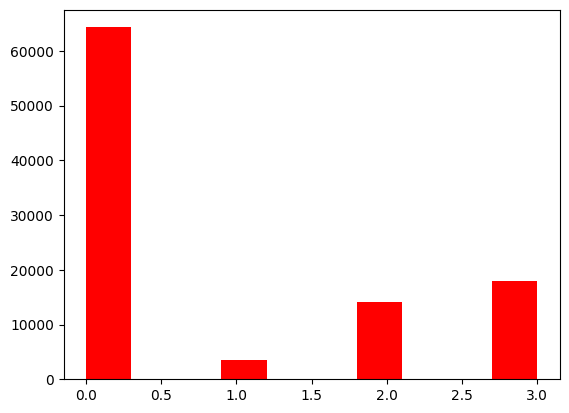

In [27]:
import matplotlib.pyplot as plt
plt.hist(df['label'], orientation = 'vertical', histtype = 'bar', color = 'red')

In [7]:
pip install imblearn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/92/e8/86c36e1b13007ca9c89381adac6c078cfc8fb71841a76c08a3fe3eca91d3/imbalanced_learn-0.12.0-py3-none-any.whl (257 kB)
Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
import numpy as np
import xgboost as xgb

kf = KFold(n_splits=5, shuffle=True, random_state=42)

abs_sum_scores = []  # 存储每一折的评分

for train_index, test_index in kf.split(X):
    X_resampled, X_test = X.iloc[train_index], X.iloc[test_index]
    y_resampled, y_test = y[train_index], y[test_index]
    # 使用找到的最佳参数设置模型
    best_params = {
    'colsample_bytree': 0.7692681476866446,
    'learning_rate': 0.0823076398078035,
    'max_depth': 6,
    'min_child_weight': 7,
    'n_estimators': 527,
    'subsample': 0.848553073033381,
    'use_label_encoder': False,
    'eval_metric': 'mlogloss'
   }

    # 初始化XGBoost模型
    model = xgb.XGBClassifier(**best_params)
    
    model.fit(X_resampled, y_resampled)
    
    # 预测概率
    y_pred_proba = model.predict_proba(X_test)
    
    # 计算abs-sum
    # 首先，我们需要将y_test转换为one-hot编码形式，以匹配y_pred_proba的格式
    y_test_one_hot = np.zeros((y_test.size, y_pred_proba.shape[1]))
    y_test_one_hot[np.arange(y_test.size), y_test.astype(int)] = 1
    
    abs_sum = np.abs(y_test_one_hot - y_pred_proba).sum() / y_test.size
    abs_sum_scores.append(abs_sum)

# 计算平均abs-sum分数
average_abs_sum = np.mean(abs_sum_scores)
print(f"Average Abs-Sum Score: {average_abs_sum}")

Average Abs-Sum Score: 0.044173902911483334
